In [120]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
airbnb = pd.read_csv("airbnb_prices.csv")

In [3]:
airbnb.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [4]:
airbnb.shape

(18723, 20)

In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18723 non-null  int64  
 1   survey_id             18723 non-null  int64  
 2   host_id               18723 non-null  int64  
 3   room_type             18723 non-null  object 
 4   country               0 non-null      float64
 5   city                  18723 non-null  object 
 6   borough               0 non-null      float64
 7   neighborhood          18723 non-null  object 
 8   reviews               18723 non-null  int64  
 9   overall_satisfaction  18723 non-null  float64
 10  accommodates          18723 non-null  int64  
 11  bedrooms              18723 non-null  float64
 12  bathrooms             0 non-null      float64
 13  price                 18723 non-null  float64
 14  minstay               0 non-null      float64
 15  name               

# Cleaning the Data

In [17]:
airbnb['bedrooms']=airbnb['bedrooms'].astype(int)

In [5]:
#Dropping the columns that are not required
airbnb.drop(columns=['country','borough','bathrooms','minstay','last_modified', 'latitude','longitude','location'], inplace = True)

In [6]:
airbnb.shape

(18723, 12)

In [7]:
#Finding if any null values
airbnb.isnull().sum()

room_id                  0
survey_id                0
host_id                  0
room_type                0
city                     0
neighborhood             0
reviews                  0
overall_satisfaction     0
accommodates             0
bedrooms                 0
price                    0
name                    52
dtype: int64

In [8]:
airbnb.duplicated().sum()

0

In [12]:
airbnb.room_type.value_counts()

Entire home/apt    14978
Private room        3682
Shared room           63
Name: room_type, dtype: int64

In [9]:
air1 = airbnb[airbnb.room_type == 'Shared room']
air1.shape[0]/airbnb.shape[0]

0.0033648453773433744

In [10]:
#The count of shared rooms is 0.3% of the total dataset, hence it can be neglegted.
airbnb = airbnb[airbnb.room_type != 'Shared room']

In [11]:
airbnb.room_type.value_counts()

Entire home/apt    14978
Private room        3682
Name: room_type, dtype: int64

# Analyzing the Data

In [12]:
airbnb.describe()

,room_id,survey_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
count,1.866000e+04,18660.0,1.866000e+04,18660.000000,18660.000000,18660.000000,18660.000000,18660.000000
mean,1.120262e+07,1476.0,3.575860e+07,16.729207,3.303778,2.921543,1.431833,166.811897
std,6.084245e+06,0.0,3.758082e+07,33.506653,2.213003,1.319141,0.880145,108.961385
min,2.818000e+03,1476.0,2.234000e+03,0.000000,0.000000,1.000000,0.000000,12.000000
25%,6.047014e+06,1476.0,7.125411e+06,2.000000,0.000000,2.000000,1.000000,108.000000
50%,1.228306e+07,1476.0,1.987107e+07,6.000000,4.500000,2.000000,1.000000,144.000000
75%,1.661017e+07,1476.0,5.201818e+07,17.000000,5.000000,4.000000,2.000000,192.000000
max,2.000373e+07,1476.0,1.418319e+08,532.000000,5.000000,17.000000,10.000000,6000.000000


In [17]:
airbnb.neighborhood.nunique()

23

In [222]:
airbnb.accommodates.unique()

array([ 8,  4,  6,  5,  3, 16, 10,  2,  7, 14, 12, 11,  9,  1, 17],
      dtype=int64)

In [223]:
airbnb.bedrooms.unique()

array([ 4,  3,  2,  1, 10,  5,  7,  6,  9,  8])

In [13]:
airbnb= airbnb[airbnb['bedrooms']!=0]

### 1. Finding correlations

In [96]:
corr = airbnb.corr()
corr

,room_id,survey_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
room_id,1.000000,NaN,0.535329,-0.388243,-0.384681,0.007384,0.003352,-0.002679
survey_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.535329,NaN,1.000000,-0.182132,-0.204685,0.023385,0.013685,-0.011527
reviews,-0.388243,NaN,-0.182132,1.000000,0.315826,-0.065316,-0.112913,-0.083765
overall_satisfaction,-0.384681,NaN,-0.204685,0.315826,1.000000,-0.057798,-0.099638,-0.046642
accommodates,0.007384,NaN,0.023385,-0.065316,-0.057798,1.000000,0.752006,0.502070
bedrooms,0.003352,NaN,0.013685,-0.112913,-0.099638,0.752006,1.000000,0.458774
price,-0.002679,NaN,-0.011527,-0.083765,-0.046642,0.502070,0.458774,1.000000


<AxesSubplot:>

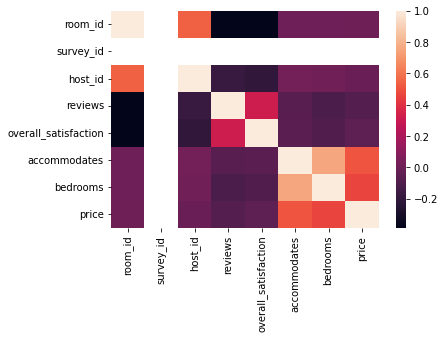

In [97]:
sns.heatmap(corr)

### 2. How does the price vary with respect to number of bedrooms

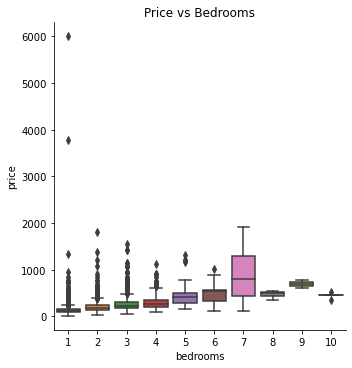

In [98]:
sns.catplot(x='bedrooms', y='price', data=airbnb, kind='box').set(title='Price vs Bedrooms')

C:\Users\a.pradeep.chivate\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Price v Bedrooms')]

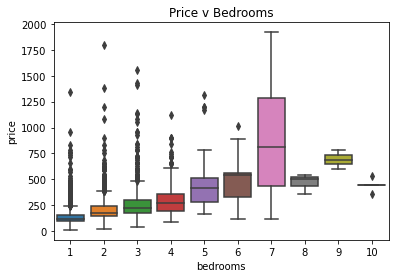

In [55]:
#Removing the extreme outliers
airbnb1 = airbnb[airbnb['price']<2500]
sns.boxplot('bedrooms', 'price', data=airbnb1).set(title='Price v Bedrooms')

Interestingly, the price of apartments with more than 7 bedrooms is less than that for those with 7 bedrooms.
Price for 10 bedroom apartment is almost equal to that of apartments with 5 rooms 

### 3. Neighborhood with the highest accommodity

C:\Users\a.pradeep.chivate\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


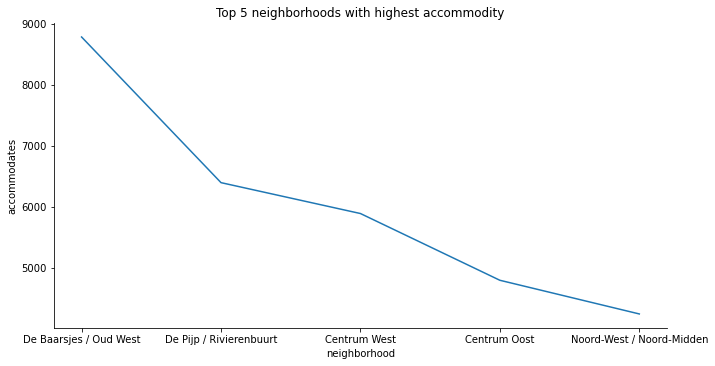

In [64]:
avail = airbnb.groupby('neighborhood').accommodates.sum().sort_values(ascending = False)[:5]
avail = avail.reset_index()
sns.relplot(x='neighborhood',y='accommodates', data = avail, legend = True, aspect = 2, kind='line').set(title='Top 5 neighborhoods with highest accommodity')

### 4. Neighborhoods with most number of apartments having rating greater than 4

In [82]:
overall_satis = airbnb[airbnb['overall_satisfaction']>=4]
ratings = pd.pivot_table(overall_satis, index = 'neighborhood', columns = 'overall_satisfaction', values='room_id', aggfunc='count')
ratings = ratings.sort_values(5.0, ascending = False)

<AxesSubplot:title={'center':'Number of apartments in each neighborhood having rating greater than 4'}, xlabel='neighborhood'>

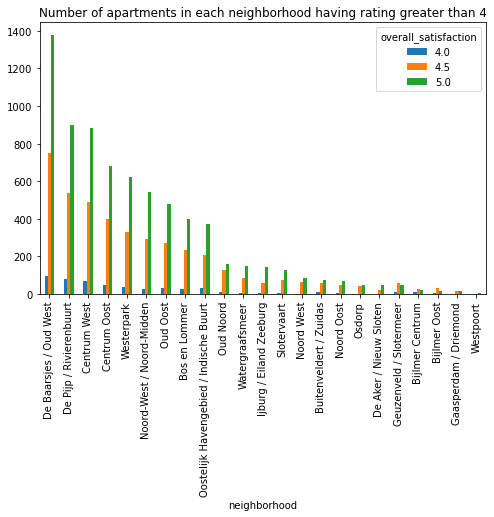

In [84]:
ratings.plot(kind='bar', figsize=(8,5), title = 'Number of apartments in each neighborhood having rating greater than 4')

### 5. Checking the Most and Least Expensive neighborhoods and their respective ratings

To check the how expensive a neighborhood is, the average price i.e Total Price/Count is not an accurate parameter as every apartment has different number of rooms. Hence, a new parameter, price/room can be used for a better and accurate comparison. 

In [96]:
prices = airbnb.groupby('neighborhood').agg({'price':'sum', 'bedrooms':'sum'})
prices = prices.reset_index()
prices['Price/Room'] = prices['price']/prices['bedrooms']
prices_top = prices.sort_values(by='Price/Room', ascending = False)[:5]
prices_top

,neighborhood,price,bedrooms,Price/Room
5,Centrum West,424213.0,2833,149.739852
4,Centrum Oost,327167.0,2389,136.947258
21,Westerpark,223282.0,1877,118.956846
8,De Pijp / Rivierenbuurt,381106.0,3255,117.083257
7,De Baarsjes / Oud West,505365.0,4515,111.930233


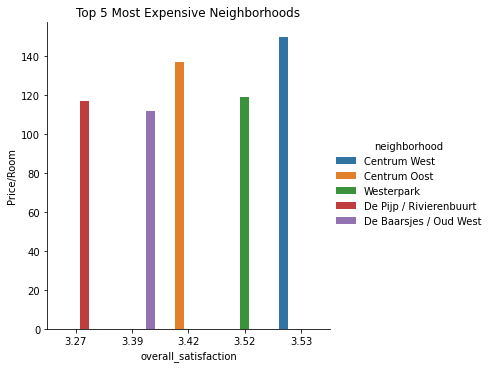

In [86]:
pricevr = airbnb.groupby('neighborhood').agg({'price':'sum', 'bedrooms':'sum', 'overall_satisfaction':'mean'})
pricevr = pricevr.reset_index()
pricevr.overall_satisfaction = pricevr.overall_satisfaction.round(2)
pricevr['Price/Room'] = pricevr['price']/pricevr['bedrooms']
prices_top = pricevr.sort_values(by='Price/Room', ascending = False)[:5]
ratings_top = pricevr.sort_values(by='overall_satisfaction', ascending = False)[:5]
sns.catplot(x='overall_satisfaction', y='Price/Room',hue='neighborhood', data = prices_top, kind='bar').set(title='Top 5 Most Expensive Neighborhoods')

In [88]:
prices_bot = pricevr.sort_values(by='Price/Room')[:5]
prices_bot

,neighborhood,price,bedrooms,overall_satisfaction,Price/Room
13,Noord West,30686.0,468,3.10,65.568376
0,Bijlmer Centrum,7917.0,116,3.32,68.250000
12,Noord Oost,29464.0,419,2.81,70.319809
1,Bijlmer Oost,9309.0,132,3.12,70.522727
11,Ijburg / Eiland Zeeburg,63811.0,841,2.78,75.875149


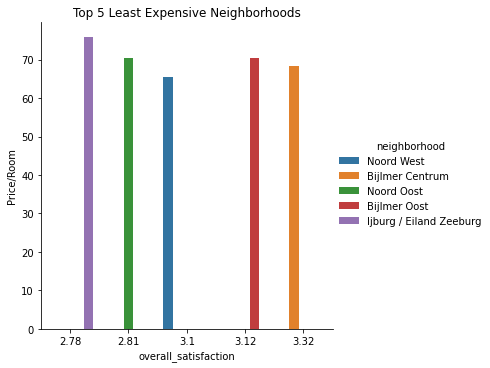

In [89]:
sns.catplot(x='overall_satisfaction', y='Price/Room',hue='neighborhood', data = prices_bot, kind='bar').set(title='Top 5 Least Expensive Neighborhoods')

From the above two charts, it can be concluded that the top 5 most expensive neighborhoods also have very good average ratings. However, some neighborhoods like 'Bijlmer Centrum', inspite of having a low price per room have a rating almost equal to the top ratings. Thus making these nighborhoods a good as well affordable places to book an apartment. The only cache(as can be seen from the tables) is they have less number of total rooms available. 

### 6. Distribution of reviews vs ratings for each room type

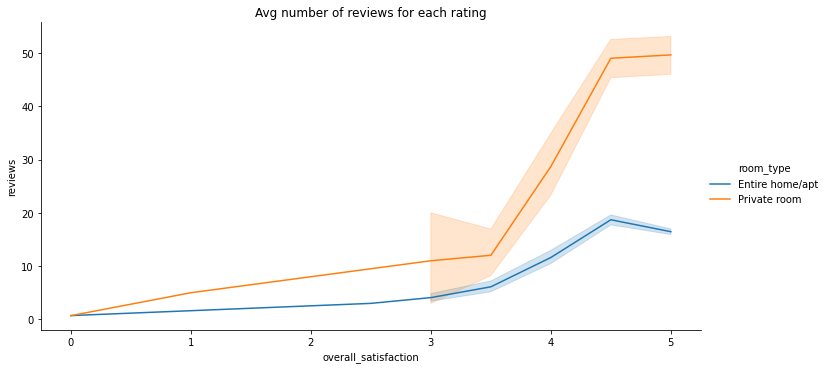

In [99]:
sns.relplot(x='overall_satisfaction', y='reviews', hue='room_type', data = airbnb,aspect = 2, kind='line').set(title='Avg number of reviews for each rating')

### For accommodates between 5 & 8, which room type has the best overall satisfaction and price less than 500?

In [144]:
roomt = airbnb[(airbnb['accommodates'].isin([5,6,7,8])) & (airbnb['price']<500)]
#roomt[roomt['room_type']=='Entire home/apt' & ]

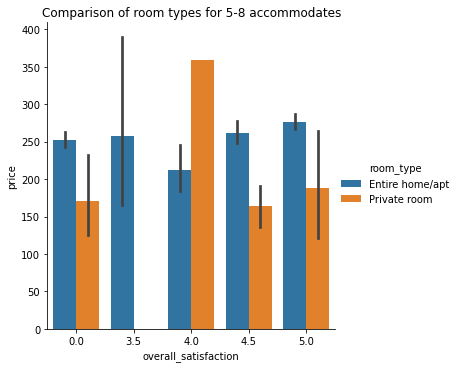

In [148]:
sns.catplot(x='overall_satisfaction', y='price', hue='room_type', data = roomt, kind = 'bar').set(title='Comparison of room types for 5-8 accommodates')

Thus, for the same overall satisfaction private rooms costs much less than the Entire home/apt